# ONLINE SALES ANALYSIS BY GLORIA LIVINGSTREAM


## OBJECTIVES
- Analyze regional and product category statistics  
- Identify most frequently purchased products  
- Identify order quantity trends  
- Analyze user payment method preferences  
- Build models to predict total revenue, customer region and preferred payment method

## BACKGROUND AND OVERVIEW
Online sales involves the sale of goods, products or services via internet environments and online channels.  
According to eMarketer, online sales reached a 22% of global retail sales by 2023 and it is estimated to reach over half the total global retail sales volume by 2024.  
  
  This project involves analyzing data from an ecommerce company.    
 The data set was sourced from Kaggle and imported into Jupyter Notebook for inspection, preprocessing and analysis.  
 The data contains information on the transaction ID, order date, product category, product name, number of units sold, unit price per product, total revenue per order, customer region and payment method used to complete the transaction.  
   
   The different columns present in the data set are displayed below with their descriptions:  
 ```Transaction ID``` : The ID assigned to each transaction  
 ```Date```  : Date order was made  
 ```Product Category``` : The category within the store, where the ordered product falls  
 ```Product Name``` : The name of the product  
 ```Units Sold``` : The quantity of products ordered  
 ```Unit Price``` : The price per product    
 ```Total Revenue``` : The unit price * units sold of the product   
 ```Region``` : The customer's region  
 ```Payment Method``` : The payment method used by the customer 

## DATA UNDERSTANDING
Import numpy, seaborn, matplotlib and pandas to assess data qualities, perform necessary cleaning and manipulations on data and to visualize insights generated from data.  
Import learning models to train and predict outcomes of specific targets.  
Checks for summary statistics and data information are performed at this stage.    
This step makes the data understandable and guides insight development.

In [1]:
#Importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [2]:
#Loading the dataset
sales = pd.read_csv("Online Sales Data.csv")
sales

Transaction ID        Date Product Category  \
0             10001  2024-01-01      Electronics   
1             10002  2024-01-02  Home Appliances   
2             10003  2024-01-03         Clothing   
3             10004  2024-01-04            Books   
4             10005  2024-01-05  Beauty Products   
..              ...         ...              ...   
235           10236  2024-08-23  Home Appliances   
236           10237  2024-08-24         Clothing   
237           10238  2024-08-25            Books   
238           10239  2024-08-26  Beauty Products   
239           10240  2024-08-27           Sports   

                                        Product Name  Units Sold  Unit Price  \
0                                      iPhone 14 Pro           2      999.99   
1                                   Dyson V11 Vacuum           1      499.99   
2                                   Levi's 501 Jeans           3       69.99   
3                                  The Da Vinci Code           4       15.99   
4                            Neutrogena Skincare Set           1       89.99   
..                                               ...         ...         ...   
235  Nespresso Vertuo Next Coffee and Espresso Maker           1      159.99   
236                        Nike Air Force 1 Sneakers           3       90.00   
237           The Handmaid's Tale by Margaret Atwood           3       10.99   
238             Sunday Riley Luna Sleeping Night Oil           1       55.00   
239                       Yeti Rambler 20 oz Tumbler           2       29.99   

     Total Revenue         Region Payment Method  
0          1999.98  North America    Credit Card  
1           499.99         Europe         PayPal  
2           209.97           Asia     Debit Card  
3            63.96  North America    Credit Card  
4            89.99         Europe         PayPal  
..             ...            ...            ...  
235         159.99         Europe         PayPal  
236         270.00           Asia     Debit Card  
237          32.97  North America    Credit Card  
238          55.00         Europe         PayPal  
239          59.98           Asia    Credit Card  

[240 rows x 9 columns]

In [3]:
# Viewing the first 15 rows of the data
sales.head(15)

Transaction ID        Date Product Category  \
0            10001  2024-01-01      Electronics   
1            10002  2024-01-02  Home Appliances   
2            10003  2024-01-03         Clothing   
3            10004  2024-01-04            Books   
4            10005  2024-01-05  Beauty Products   
5            10006  2024-01-06           Sports   
6            10007  2024-01-07      Electronics   
7            10008  2024-01-08  Home Appliances   
8            10009  2024-01-09         Clothing   
9            10010  2024-01-10            Books   
10           10011  2024-01-11  Beauty Products   
11           10012  2024-01-12           Sports   
12           10013  2024-01-13      Electronics   
13           10014  2024-01-14  Home Appliances   
14           10015  2024-01-15         Clothing   

                        Product Name  Units Sold  Unit Price  Total Revenue  \
0                      iPhone 14 Pro           2      999.99        1999.98   
1                   Dyson V11 Vacuum           1      499.99         499.99   
2                   Levi's 501 Jeans           3       69.99         209.97   
3                  The Da Vinci Code           4       15.99          63.96   
4            Neutrogena Skincare Set           1       89.99          89.99   
5        Wilson Evolution Basketball           5       29.99         149.95   
6                MacBook Pro 16-inch           1     2499.99        2499.99   
7               Blueair Classic 480i           2      599.99        1199.98   
8                   Nike Air Force 1           6       89.99         539.94   
9              Dune by Frank Herbert           2       25.99          51.98   
10              Chanel No. 5 Perfume           1      129.99         129.99   
11  Babolat Pure Drive Tennis Racket           3      199.99         599.97   
12             Samsung Galaxy Tab S8           2      749.99        1499.98   
13       Keurig K-Elite Coffee Maker           1      189.99         189.99   
14            North Face Down Jacket           2      249.99         499.98   

           Region Payment Method  
0   North America    Credit Card  
1          Europe         PayPal  
2            Asia     Debit Card  
3   North America    Credit Card  
4          Europe         PayPal  
5            Asia    Credit Card  
6   North America    Credit Card  
7          Europe         PayPal  
8            Asia     Debit Card  
9   North America    Credit Card  
10         Europe         PayPal  
11           Asia    Credit Card  
12  North America    Credit Card  
13         Europe         PayPal  
14           Asia     Debit Card

In [4]:
# Viewing the last 15 rows of the data
sales.tail(15)

Transaction ID        Date Product Category  \
225           10226  2024-08-13            Books   
226           10227  2024-08-14  Beauty Products   
227           10228  2024-08-15           Sports   
228           10229  2024-08-16      Electronics   
229           10230  2024-08-17  Home Appliances   
230           10231  2024-08-18         Clothing   
231           10232  2024-08-19            Books   
232           10233  2024-08-20  Beauty Products   
233           10234  2024-08-21           Sports   
234           10235  2024-08-22      Electronics   
235           10236  2024-08-23  Home Appliances   
236           10237  2024-08-24         Clothing   
237           10238  2024-08-25            Books   
238           10239  2024-08-26  Beauty Products   
239           10240  2024-08-27           Sports   

                                        Product Name  Units Sold  Unit Price  \
225           The Silent Patient by Alex Michaelides           3       26.99   
226         The Ordinary Caffeine Solution 5% + EGCG           1        6.70   
227                                      Fitbit Luxe           2      149.95   
228                          Google Nest Wifi Router           1      169.00   
229                             Anova Precision Oven           1      599.00   
230                  Adidas Originals Trefoil Hoodie           4       64.99   
231                            Dune by Frank Herbert           2        9.99   
232                        Fresh Sugar Lip Treatment           1       24.00   
233          Hydro Flask Standard Mouth Water Bottle           3       32.95   
234      Bose QuietComfort 35 II Wireless Headphones           1      299.00   
235  Nespresso Vertuo Next Coffee and Espresso Maker           1      159.99   
236                        Nike Air Force 1 Sneakers           3       90.00   
237           The Handmaid's Tale by Margaret Atwood           3       10.99   
238             Sunday Riley Luna Sleeping Night Oil           1       55.00   
239                       Yeti Rambler 20 oz Tumbler           2       29.99   

     Total Revenue         Region Payment Method  
225          80.97  North America    Credit Card  
226           6.70         Europe         PayPal  
227         299.90           Asia    Credit Card  
228         169.00  North America    Credit Card  
229         599.00         Europe         PayPal  
230         259.96           Asia     Debit Card  
231          19.98  North America    Credit Card  
232          24.00         Europe         PayPal  
233          98.85           Asia    Credit Card  
234         299.00  North America    Credit Card  
235         159.99         Europe         PayPal  
236         270.00           Asia     Debit Card  
237          32.97  North America    Credit Card  
238          55.00         Europe         PayPal  
239          59.98           Asia    Credit Card

In [5]:
# Analyzing column names present in the data
list(sales.columns)

['Transaction ID',
 'Date',
 'Product Category',
 'Product Name',
 'Units Sold',
 'Unit Price',
 'Total Revenue',
 'Region',
 'Payment Method']

In [6]:
# Determining the shape of the data
sales.shape

(240, 9)

In [7]:
# Summary of the data
sales.describe()

Transaction ID  Units Sold   Unit Price  Total Revenue
count       240.00000  240.000000   240.000000     240.000000
mean      10120.50000    2.158333   236.395583     335.699375
std          69.42622    1.322454   429.446695     485.804469
min       10001.00000    1.000000     6.500000       6.500000
25%       10060.75000    1.000000    29.500000      62.965000
50%       10120.50000    2.000000    89.990000     179.970000
75%       10180.25000    3.000000   249.990000     399.225000
max       10240.00000   10.000000  3899.990000    3899.990000

In [8]:
# Inspecting the data
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    240 non-null    int64  
 1   Date              240 non-null    object 
 2   Product Category  240 non-null    object 
 3   Product Name      240 non-null    object 
 4   Units Sold        240 non-null    int64  
 5   Unit Price        240 non-null    float64
 6   Total Revenue     240 non-null    float64
 7   Region            240 non-null    object 
 8   Payment Method    240 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 12.2+ KB


## DATA PREPARATION AND CLEANING
This part of the project involves addressing anomalies within the data and performing data cleaning operations.  
Checks for missing values, duplicates, inconsistent values and correction of data types are performed at this stage

In [9]:
#Changing the data types of transaction ID, product category, payment method and region
sales["Transaction ID"] = sales["Transaction ID"].astype('object')
sales["Transaction ID"].dtype

dtype('O')

In [10]:
sales["Product Category"] = sales["Product Category"].astype('category')
sales["Product Category"].dtype

CategoricalDtype(categories=['Beauty Products', 'Books', 'Clothing', 'Electronics',
                  'Home Appliances', 'Sports'],
                 ordered=False)

In [11]:
sales["Payment Method"] = sales["Payment Method"].astype('category')
sales["Payment Method"].dtype

CategoricalDtype(categories=['Credit Card', 'Debit Card', 'PayPal'], ordered=False)

In [12]:
sales["Region"] = sales["Region"].astype('category')
sales["Region"].dtype

CategoricalDtype(categories=['Asia', 'Europe', 'North America'], ordered=False)

In [13]:
# Inspecting the data after changing data types
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Transaction ID    240 non-null    object  
 1   Date              240 non-null    object  
 2   Product Category  240 non-null    category
 3   Product Name      240 non-null    object  
 4   Units Sold        240 non-null    int64   
 5   Unit Price        240 non-null    float64 
 6   Total Revenue     240 non-null    float64 
 7   Region            240 non-null    category
 8   Payment Method    240 non-null    category
dtypes: category(3), float64(2), int64(1), object(3)
memory usage: 9.4+ KB


In [14]:
# Finding columns and rows with missing values
missing_values = sales.isnull().sum()
print(missing_values)

Transaction ID      0
Date                0
Product Category    0
Product Name        0
Units Sold          0
Unit Price          0
Total Revenue       0
Region              0
Payment Method      0
dtype: int64


There are no missing values in the data set so we proceed with the analysis.

In [15]:
# Renaming date column to order date
sales.rename(columns={'Date': 'Order Date'}, inplace=True)

In [16]:
# Checking the data after changing the column name
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Transaction ID    240 non-null    object  
 1   Order Date        240 non-null    object  
 2   Product Category  240 non-null    category
 3   Product Name      240 non-null    object  
 4   Units Sold        240 non-null    int64   
 5   Unit Price        240 non-null    float64 
 6   Total Revenue     240 non-null    float64 
 7   Region            240 non-null    category
 8   Payment Method    240 non-null    category
dtypes: category(3), float64(2), int64(1), object(3)
memory usage: 9.4+ KB


In [17]:
# Finding the number of duplicates in the dataset
sales.duplicated().sum()

0

There are no duplicates in the data set so we proceed with the analysis.

In [18]:
# Saving the cleaned data to a csv file 
import os
df = pd.DataFrame(sales)
downloads_path = os.path.join(os.path.expanduser('~'), 'Downloads')
filename = 'online_sales.csv'
filepath = os.path.join(downloads_path, filename)
df.to_csv(filepath, index=False)

In [19]:
# Importing the Cleaned Dataset
sales_clean = pd.read_csv('online_sales.csv')
sales_clean

Transaction ID  Order Date Product Category  \
0             10001  2024-01-01      Electronics   
1             10002  2024-01-02  Home Appliances   
2             10003  2024-01-03         Clothing   
3             10004  2024-01-04            Books   
4             10005  2024-01-05  Beauty Products   
..              ...         ...              ...   
235           10236  2024-08-23  Home Appliances   
236           10237  2024-08-24         Clothing   
237           10238  2024-08-25            Books   
238           10239  2024-08-26  Beauty Products   
239           10240  2024-08-27           Sports   

                                        Product Name  Units Sold  Unit Price  \
0                                      iPhone 14 Pro           2      999.99   
1                                   Dyson V11 Vacuum           1      499.99   
2                                   Levi's 501 Jeans           3       69.99   
3                                  The Da Vinci Code           4       15.99   
4                            Neutrogena Skincare Set           1       89.99   
..                                               ...         ...         ...   
235  Nespresso Vertuo Next Coffee and Espresso Maker           1      159.99   
236                        Nike Air Force 1 Sneakers           3       90.00   
237           The Handmaid's Tale by Margaret Atwood           3       10.99   
238             Sunday Riley Luna Sleeping Night Oil           1       55.00   
239                       Yeti Rambler 20 oz Tumbler           2       29.99   

     Total Revenue         Region Payment Method  
0          1999.98  North America    Credit Card  
1           499.99         Europe         PayPal  
2           209.97           Asia     Debit Card  
3            63.96  North America    Credit Card  
4            89.99         Europe         PayPal  
..             ...            ...            ...  
235         159.99         Europe         PayPal  
236         270.00           Asia     Debit Card  
237          32.97  North America    Credit Card  
238          55.00         Europe         PayPal  
239          59.98           Asia    Credit Card  

[240 rows x 9 columns]

## VISUALIZATION OF INSIGHTS

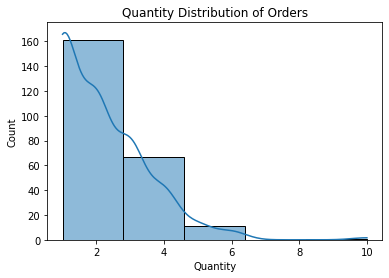

In [20]:
# Determining the skewness and distribution of the data using the units sold
sns.histplot(sales_clean['Units Sold'].dropna(), bins=5, kde=True)
plt.title('Quantity Distribution of Orders')
plt.xlabel('Quantity')
plt.ylabel('Count')
plt.show()

From the histogram, the data is positively skewed with a unimodal occurence around 1 to 2 quantities of products ordered. This means the most frequently ordered quantities of products ranges between 1 and 2.  
The distribution of quantites ordered can further be likened to an exponential distribution.

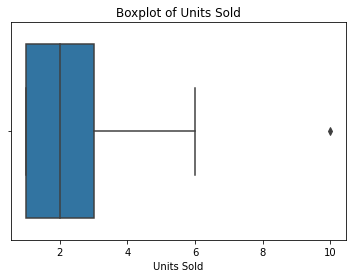

In [21]:
# Using a box plot to determine the outliers in the dataset
sns.boxplot(x=sales_clean["Units Sold"])
plt.title("Boxplot of Units Sold")
plt.show()

From the plot, only a single outlier is observed around 10, where as the median is seen to occur at 2.

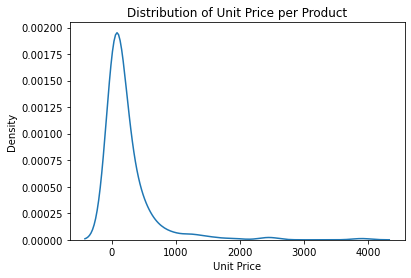

In [22]:
# Displaying the distribution of unit price 
sns.kdeplot(sales_clean["Unit Price"])
plt.title("Distribution of Unit Price per Product")
plt.show() 

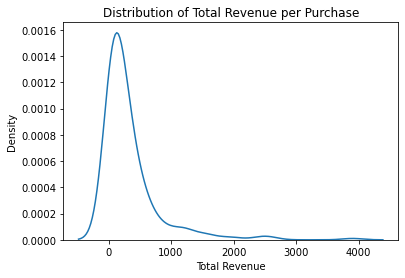

In [23]:
# Displaying the distribution of total revenue
sns.kdeplot(sales_clean["Total Revenue"])
plt.title("Distribution of Total Revenue per Purchase")
plt.show()

A normal distribution is observed for both the unit price and total revenue per purchase. 

In [24]:
# Finding the average unit price per product category
avg_price_category = df.groupby("Product Category")["Unit Price"].mean()
avg_price_category = avg_price_category.to_frame()
avg_price_category

Unit Price
Product Category            
Beauty Products      61.6230
Books                16.1530
Clothing             67.5365
Electronics         691.5915
Home Appliances     320.1855
Sports              261.2840

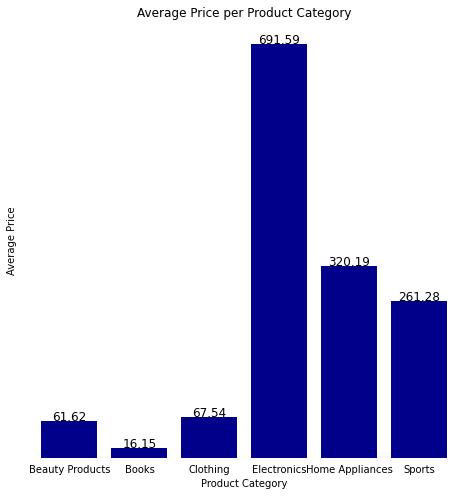

In [25]:
# Displaying the average unit price per product category
plt.figure(figsize=(8,8))
for i in range(len(avg_price_category.index)):
    plt.text(i, avg_price_category['Unit Price'][i]+0.5, round(avg_price_category['Unit Price'][i],2),
             horizontalalignment = 'center',
             fontdict={'fontsize':12,'fontweight':2},color = 'black')

# Taking off all ticks
plt.tick_params(axis='x', which='both', top=False,bottom=False, labelleft=False,reset=True)
plt.tick_params(axis='y', which='both', right=False,left=False, labelleft=False,reset=True)

# Taking off spines
for pos in ['right', 'top', 'bottom', 'left']:
    plt.gca().spines[pos].set_visible(False)
    
plt.bar(avg_price_category.index, avg_price_category['Unit Price'], color='darkblue')
plt.title("Average Price per Product Category")
plt.xlabel("Product Category")
plt.ylabel("Average Price")
plt.show()

The product category with the highest average price is seen to be the Electronics category. Books have the lowest average prices among the product categories.

In [26]:
# Finding the total revenue per product category
revenue_category = df.groupby("Product Category")["Total Revenue"].sum()
revenue_category = revenue_category.to_frame()
revenue_category

Total Revenue
Product Category               
Beauty Products         2621.90
Books                   1861.93
Clothing                8128.93
Electronics            34982.41
Home Appliances        18646.16
Sports                 14326.52

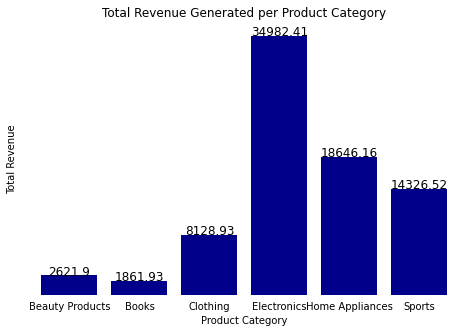

In [27]:
# Displaying the total revenue per product category
plt.figure(figsize=(8,5))
for i in range(len(revenue_category.index)):
    plt.text(i, revenue_category['Total Revenue'][i]+1, round(revenue_category['Total Revenue'][i],2),
             horizontalalignment = 'center',
             fontdict={'fontsize':12,'fontweight':2},color = 'black')

# Taking off all ticks
plt.tick_params(axis='x', which='both', top=False,bottom=False, labelleft=False,reset=True)
plt.tick_params(axis='y', which='both', right=False,left=False, labelleft=False,reset=True)

# Taking off spines
for pos in ['right', 'top', 'bottom', 'left']:
    plt.gca().spines[pos].set_visible(False)
    
plt.bar(revenue_category.index, revenue_category['Total Revenue'], color='darkblue')
plt.title("Total Revenue Generated per Product Category")
plt.xlabel("Product Category")
plt.ylabel("Total Revenue")
plt.show()

The total revenue generated from each category is as seen above , with electronics being the top category for revenue generation. 

In [28]:
# Finding the top 10 most popular products by units sold
popular_products = df.groupby("Product Name")["Units Sold"].sum()
popular_products = popular_products.to_frame()
popular_products = df.sort_values(by='Units Sold', ascending = False).head(10)
popular_products

Transaction ID  Order Date Product Category  \
62           10063  2024-03-03         Clothing   
83           10084  2024-03-24           Sports   
98           10099  2024-04-08         Clothing   
47           10048  2024-02-17           Sports   
8            10009  2024-01-09         Clothing   
164          10165  2024-06-13         Clothing   
53           10054  2024-02-23           Sports   
56           10057  2024-02-26         Clothing   
122          10123  2024-05-02         Clothing   
32           10033  2024-02-02         Clothing   

                       Product Name  Units Sold  Unit Price  Total Revenue  \
62        Hanes ComfortSoft T-Shirt          10        9.99          99.90   
83   Spalding NBA Street Basketball           6       24.99         149.94   
98   Gap Essential Crewneck T-Shirt           6       19.99         119.94   
47             Yeti Rambler Tumbler           6       39.99         239.94   
8                  Nike Air Force 1           6       89.99         539.94   
164         Adidas 3-Stripes Shorts           5       29.99         149.95   
53       Titleist Pro V1 Golf Balls           5       49.99         249.95   
56        Calvin Klein Boxer Briefs           5       29.99         149.95   
122          Forever 21 Graphic Tee           5       12.99          64.95   
32    Under Armour HeatGear T-Shirt           5       29.99         149.95   

    Region Payment Method  
62    Asia     Debit Card  
83    Asia    Credit Card  
98    Asia     Debit Card  
47    Asia    Credit Card  
8     Asia     Debit Card  
164   Asia     Debit Card  
53    Asia    Credit Card  
56    Asia     Debit Card  
122   Asia     Debit Card  
32    Asia     Debit Card

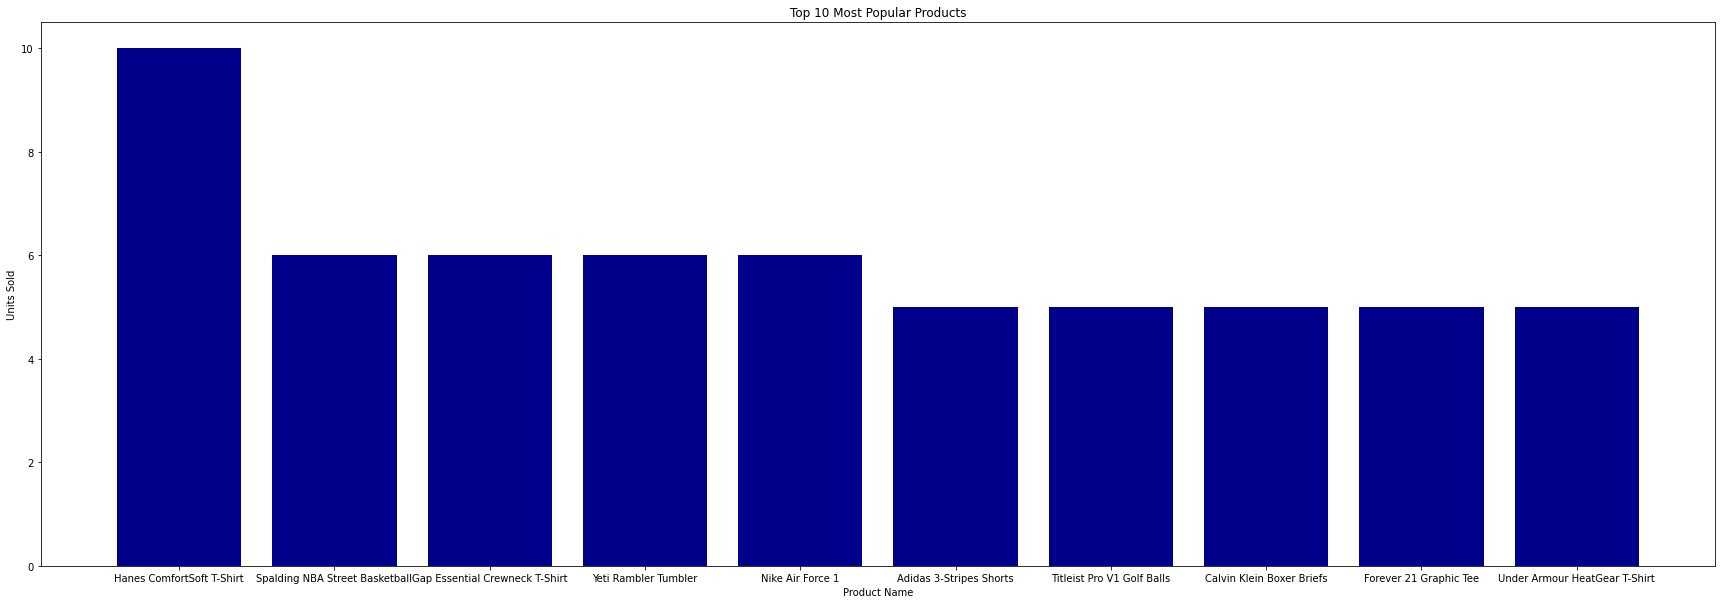

In [29]:
# Displaying the top 10 most popular products
plt.figure(figsize=(30,10))    
plt.bar(popular_products['Product Name'], popular_products['Units Sold'], color='darkblue')
plt.title("Top 10 Most Popular Products")
plt.xlabel("Product Name")
plt.ylabel("Units Sold")
plt.show()

The most popular product according to the units sold is the Hanes ComfortSoft T-Shirt.

In [30]:
# Finding the total revenue generated per region
revenue_region = df.groupby("Region")["Total Revenue"].sum()
revenue_region = revenue_region.to_frame()
revenue_region

Total Revenue
Region                      
Asia                22455.45
Europe              21268.06
North America       36844.34

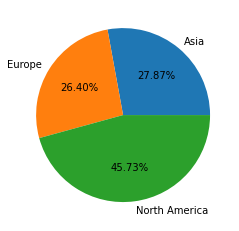

In [31]:
# Displaying the total revenue per region
plt.pie(revenue_region["Total Revenue"],autopct = '%.2f%%',labels=revenue_region.index );

The highest total revenue for the company was generated from North America.

In [32]:
# Finding the distribution of the payment methods
pay_method= df['Payment Method'].value_counts().sort_values()
paymethod_count = pay_method.reset_index()
paymethod_count.columns = ['Payment Method', 'Count']
paymethod_count.sort_values(by="Count", ascending =False)
paymethod_count

Payment Method  Count
0     Debit Card     40
1         PayPal     80
2    Credit Card    120

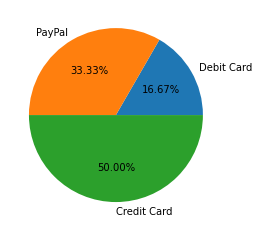

In [33]:
 # Displaying the popularity of payment methods
plt.pie(paymethod_count["Count"],autopct = '%.2f%%',labels=paymethod_count['Payment Method']);

Credit cards were frequently used as the payment method by customers who patronized products from this organization. Paypal was the second common method used for payment by customers, with debit cards being the least used payment method.

## MACHINE LEARNING

### LINEAR REGRESSION MODEL

Given the units sold and unit price, a linear regression model would be utilized to determine future predictions of the total revenue generated by the e-commerce organization

In [34]:
# Scaling the total revenue column
scaler = MinMaxScaler()
sales_clean['Total Revenue Scaled'] = scaler.fit_transform(sales_clean[['Total Revenue']])
print(sales_clean[['Total Revenue', 'Total Revenue Scaled']].head())

   Total Revenue  Total Revenue Scaled
0        1999.98              0.512003
1         499.99              0.126747
2         209.97              0.052259
3          63.96              0.014758
4          89.99              0.021443


In [35]:
# Selecting the required columns for data modeling
a =sales_clean[['Units Sold','Unit Price']]
b = sales_clean[["Total Revenue Scaled"]]

In [36]:
# Splitting the data set into train and test sections of 80% and 20% respectively
a_train, a_test, b_train, b_test = train_test_split(a, b, test_size=0.2, random_state=42)

In [37]:
#Training the model
model = LinearRegression()
model.fit(a_train, b_train)

LinearRegression()

In [38]:
# Predicting with the model
b_pred = model.predict(a_test)
b_pred

array([[0.09038629],
       [0.71740118],
       [0.03176697],
       [0.05048534],
       [0.03889214],
       [0.01329481],
       [0.03688569],
       [0.05029241],
       [0.02359824],
       [0.09038629],
       [0.04806125],
       [0.04412158],
       [0.07613595],
       [0.20438899],
       [0.09303203],
       [0.05732112],
       [0.14737624],
       [0.03775211],
       [0.04316724],
       [0.06188561],
       [0.13019077],
       [0.03338493],
       [0.05048534],
       [0.11594043],
       [0.04304513],
       [0.10463663],
       [0.04193514],
       [0.02046316],
       [0.03062694],
       [0.02103318],
       [0.1129939 ],
       [0.05305325],
       [0.05618547],
       [0.04459228],
       [0.15869145],
       [0.01932314],
       [0.06188561],
       [0.14738764],
       [0.14738764],
       [0.0304384 ],
       [0.05892768],
       [0.00916221],
       [0.17588832],
       [0.11888696],
       [0.26139035],
       [0.34689238],
       [0.04136074],
       [0.055

In [39]:
# Evluating the error between actual and predicted values
mse = mean_squared_error(b_test,b_pred)
print(f'The mean square error is:{mse}')

The mean square error is:0.0011956424763083999


Given that the mean square error is close to 0, it can be deduced that the machine has learnt accurately and would be able to predict future revenues, given the unit price and units sold per item.

### DECISION TREE MODEL

This model would be used to predict a customer's region, given the product name, product category, units sold, unit price per product and the total revenue. Regional predictions would be beneficial in analyzing company's reach and visibility.

In [40]:
# Converting the categorical columns to numeric using Label Encoding
numerical = {}
category = ['Product Name','Product Category', 'Region']

for column in category:
    le = LabelEncoder()
    sales_clean[column] = le.fit_transform(sales_clean[column])
    numerical[column] = le

In [41]:
# Selecting the required columns
x =sales_clean[['Product Name','Product Category','Units Sold','Unit Price', 'Total Revenue Scaled']]
y = sales_clean[["Region"]]

In [42]:
# Splitting the data into train and test sections of 75% and 25% respectively
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [43]:
# Training the model
model = DecisionTreeClassifier(random_state=42)
model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [44]:
#Making predictions with the model
y_pred = model.predict(x_test)

In [45]:
# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [46]:
# Viewing the evaluation report
print(f"The accuracy of this model is: {accuracy}")
print(f"The classification report is:\n {report}")

The accuracy of this model is: 1.0
The classification report is:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        26

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



The accuracy score of 1 means that the model predicted the regions perfectly. This could be as a result of overfitting the model, hence more training would have to be administered to the model.  
Using a test size of 60% to retrain the model an review the accuracy

In [47]:
# Splitting the data into train and test sections of 40% and 60% respectively
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.6, random_state=42)

In [48]:
# Training the model
model = DecisionTreeClassifier(random_state=42)
model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [49]:
#Making predictions with the model
y_pred = model.predict(x_test)

In [50]:
# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [51]:
# Viewing the evaluation report
print(f"The accuracy of this model is: {accuracy}")
print(f"The classification report is:\n {report}")

The accuracy of this model is: 0.875
The classification report is:
               precision    recall  f1-score   support

           0       0.75      0.94      0.84        49
           1       1.00      0.95      0.97        39
           2       0.93      0.77      0.84        56

    accuracy                           0.88       144
   macro avg       0.90      0.89      0.88       144
weighted avg       0.89      0.88      0.88       144



Using a test size of 60% of the data set gives 87.5% accuracy. Further investigations could be implemented to select the appropriate parameters.

### LOGISTIC REGRESSION MODEL

This model would be used to predict the payment method a customer would prefer, when purchasing products from the company

In [52]:
# Converting the categorical columns to numeric using Label Encoding
numerical = {}
category = ['Product Name','Product Category', 'Region', 'Payment Method']

for column in category:
    le = LabelEncoder()
    sales_clean[column] = le.fit_transform(sales_clean[column])
    numerical[column] = le

In [53]:
# Selecting the required columns
s =sales_clean[['Product Name','Product Category','Units Sold','Unit Price', 'Region']]
t = sales_clean[["Payment Method"]]

In [54]:
# Splitting the data into train and test sections of 80% and 20% respectively
s_train, s_test, t_train, t_test = train_test_split(s, t, test_size=0.2, random_state=42)

In [55]:
# Training the model
model = LogisticRegression()
model.fit(s_train, t_train)

C:\Users\Gloria Selassie\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Gloria Selassie\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [56]:
#Making predictions with the model
t_pred = model.predict(s_test)

In [57]:
# Evaluating the model
accuracy = accuracy_score(t_test, t_pred)
print(f"The accuracy of this model is: {accuracy}")

The accuracy of this model is: 0.8125


Given the accuracy of 81%, the model could be used for predicting the payment method or retrained to provide for more accurate predictions of the payment method.